<a href="https://colab.research.google.com/github/mlzzi/Calculo-de-Metricas-de-Avaliacao-de-Aprendizado/blob/main/C%C3%A1lculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [49]:
tf.__version__

'2.17.1'

In [50]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [51]:
logdir='log'

In [52]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8951 - loss: 0.3378 - val_accuracy: 0.9860 - val_loss: 0.0445
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 32ms/step - accuracy: 0.9844 - loss: 0.0495 - val_accuracy: 0.9896 - val_loss: 0.0311
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accuracy: 0.9883 - val_loss: 0.0348
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 36ms/step - accuracy: 0.9923 - loss: 0.0251 - val_accuracy: 0.9898 - val_loss: 0.0350
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9927 - loss: 0.0214 - val_accuracy: 0.9919 - val_loss: 0.0264


In [56]:
y_true=test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [57]:
classes=[0,1,2,3,4,5,6,7,8,9]

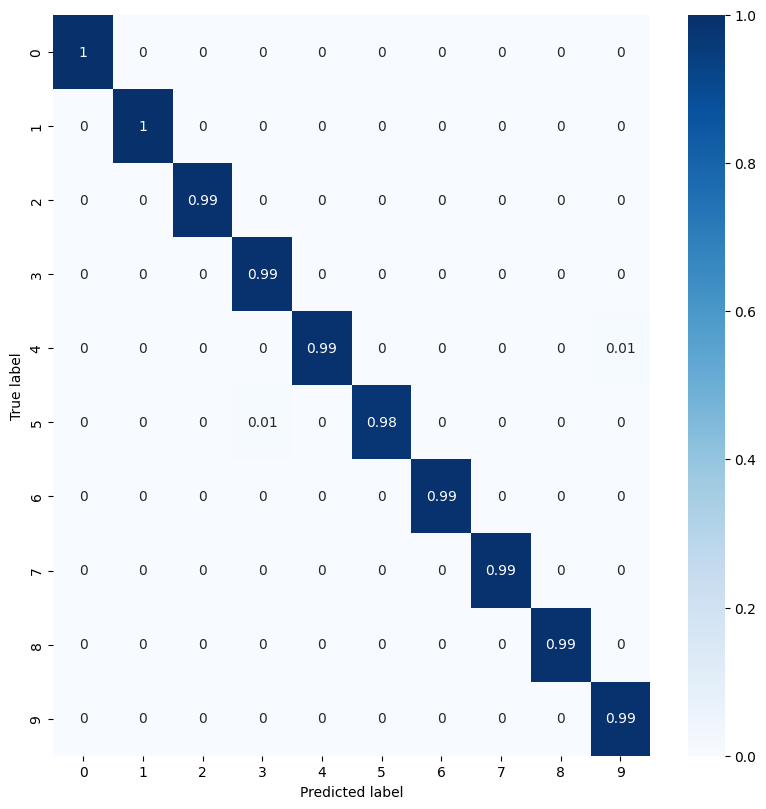

In [58]:
con_mat = tf.math.confusion_matrix(labels=y_true,predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [59]:
# Inicializando as listas para armazenar os valores
vp = []
fn = []
fp = []
vn = []

In [60]:
# Calculando VN, VP, FN e FP para cada classe
for i in range(len(classes)):
    # Verdadeiro Positivo (VP)
    vp_i = con_mat[i][i]

    # Falso Negativo (FN)
    fn_i = np.sum(con_mat[i, :]) - vp_i

    # Falso Positivo (FP)
    fp_i = np.sum(con_mat[:, i]) - vp_i

    # Verdadeiro Negativo (VN)
    vn_i = con_mat.sum() - (fn_i + fp_i + vp_i)

    # Adicionando os valores nas listas
    vp.append(vp_i)
    fn.append(fn_i)
    fp.append(fp_i)
    vn.append(vn_i)

In [61]:
# Mostrando os resultados
for i in range(len(classes)):
    print(f"Classe {classes[i]}:")
    print(f"VP: {vp[i]}, FN: {fn[i]}, FP: {fp[i]}, VN: {vn[i]}")

Classe 0:
VP: 978, FN: 2, FP: 9, VN: 9011
Classe 1:
VP: 1135, FN: 0, FP: 17, VN: 8848
Classe 2:
VP: 1021, FN: 11, FP: 5, VN: 8963
Classe 3:
VP: 1004, FN: 6, FP: 11, VN: 8979
Classe 4:
VP: 977, FN: 5, FP: 4, VN: 9014
Classe 5:
VP: 878, FN: 14, FP: 6, VN: 9102
Classe 6:
VP: 949, FN: 9, FP: 3, VN: 9039
Classe 7:
VP: 1018, FN: 10, FP: 8, VN: 8964
Classe 8:
VP: 964, FN: 10, FP: 5, VN: 9021
Classe 9:
VP: 995, FN: 14, FP: 13, VN: 8978


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Calculando Sensibilidade, Acurácia e F1-Score para cada classe
accuracy = accuracy_score(y_true, y_pred)
sensibilidade = recall_score(y_true, y_pred, average=None)
precisao = precision_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

print(f"Acurácia: {accuracy:.4f}")

for i in range(len(classes)):
    print(f"Classe {classes[i]}:")
    print(f"Sensibilidade: {sensibilidade[i]:.4f}")
    print(f"Precisão: {precisao[i]:.4f}")
    print(f"F1-Score: {f1[i]:.4f}")

Acurácia: 0.9919
Classe 0:
Sensibilidade: 0.9980
Precisão: 0.9909
F1-Score: 0.9944
Classe 1:
Sensibilidade: 1.0000
Precisão: 0.9852
F1-Score: 0.9926
Classe 2:
Sensibilidade: 0.9893
Precisão: 0.9951
F1-Score: 0.9922
Classe 3:
Sensibilidade: 0.9941
Precisão: 0.9892
F1-Score: 0.9916
Classe 4:
Sensibilidade: 0.9949
Precisão: 0.9959
F1-Score: 0.9954
Classe 5:
Sensibilidade: 0.9843
Precisão: 0.9932
F1-Score: 0.9887
Classe 6:
Sensibilidade: 0.9906
Precisão: 0.9968
F1-Score: 0.9937
Classe 7:
Sensibilidade: 0.9903
Precisão: 0.9922
F1-Score: 0.9912
Classe 8:
Sensibilidade: 0.9897
Precisão: 0.9948
F1-Score: 0.9923
Classe 9:
Sensibilidade: 0.9861
Precisão: 0.9871
F1-Score: 0.9866


In [63]:
# Gerando a curva ROC
# Para a curva ROC, devemos binarizar as etiquetas (classe 0 ou 1 para cada classe)
y_true_bin = label_binarize(y_true, classes=classes)
y_pred_prob = model.predict(test_images)  # Probabilidades preditas para cada classe

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [64]:
# Calculando a curva ROC para cada classe
fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

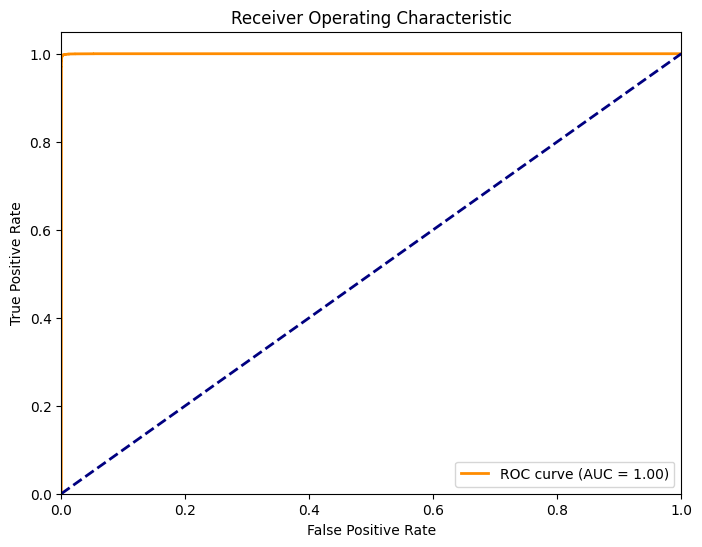

In [65]:
# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()